In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns
from scipy import stats
import os

In [3]:
# Load the CSV file
file_path = 'togo-dapaong_qc.csv'  
data = pd.read_csv(file_path)

# Calculate summary statistics
summary_statistics = data.describe()

# Display the summary statistics
print("Summary Statistics:\n", summary_statistics)



Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [4]:
#Data quality check
# Check for missing values
missing_values = data.isnull().sum()
# Display missing values count
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Comments    525600
dtype: int64


In [9]:
# Check for negative values in specific columns
negative_entries = {
    'GHI': data[data['GHI'] < 0],
    'DNI': data[data['DNI'] < 0],
    'DHI': data[data['DHI'] < 0],
    'ModA': data[data['ModA'] < 0],
    'ModB': data[data['ModB'] < 0],
    'WS': data[data['WS'] < 0],
    'WSgust': data[data['WSgust'] < 0]
}

# Display negative entries
for column, entries in negative_entries.items():
    if not entries.empty:
        print(f"\nNegative values in {column}:\n", entries)


Negative values in GHI:
                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...   ...   ...   ...   ...  ...     ...   
2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

In [6]:
# Detecting outliers using IQR method for sensor readings and wind speed data
def detect_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Checking for outliers
outliers = {
    'ModA': detect_outliers_iqr(data['ModA']),
    'ModB': detect_outliers_iqr(data['ModB']),
    'WS': detect_outliers_iqr(data['WS']),
    'WSgust': detect_outliers_iqr(data['WSgust'])
}

# Display outliers
for column, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"\nOutliers in {column}:\n", outlier_values)


Outliers in ModA:
 674       1140.0
675       1133.0
681       1063.0
707       1068.0
708       1068.0
           ...  
522079    1070.1
522080    1070.1
522081    1107.0
522087    1086.5
522088    1069.1
Name: ModA, Length: 1237, dtype: float64

Outliers in ModB:
 674       1126.0
675       1118.0
681       1049.0
682       1033.0
683       1028.0
           ...  
521950    1031.0
522022    1076.0
522023    1122.0
522081    1062.0
522087    1043.0
Name: ModB, Length: 1537, dtype: float64

Outliers in WS:
 5410      6.6
5411      6.9
5413      7.1
5414      6.1
5420      6.1
         ... 
509569    8.2
509570    6.3
523566    6.1
523568    6.2
523629    6.1
Name: WS, Length: 8708, dtype: float64

Outliers in WSgust:
 5410      9.7
5411      8.9
5413      8.9
5414      8.4
5420      8.9
         ... 
509585    8.9
523567    8.2
523568    8.2
523589    8.4
523628    8.2
Name: WSgust, Length: 7377, dtype: float64


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9992\1432952908.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


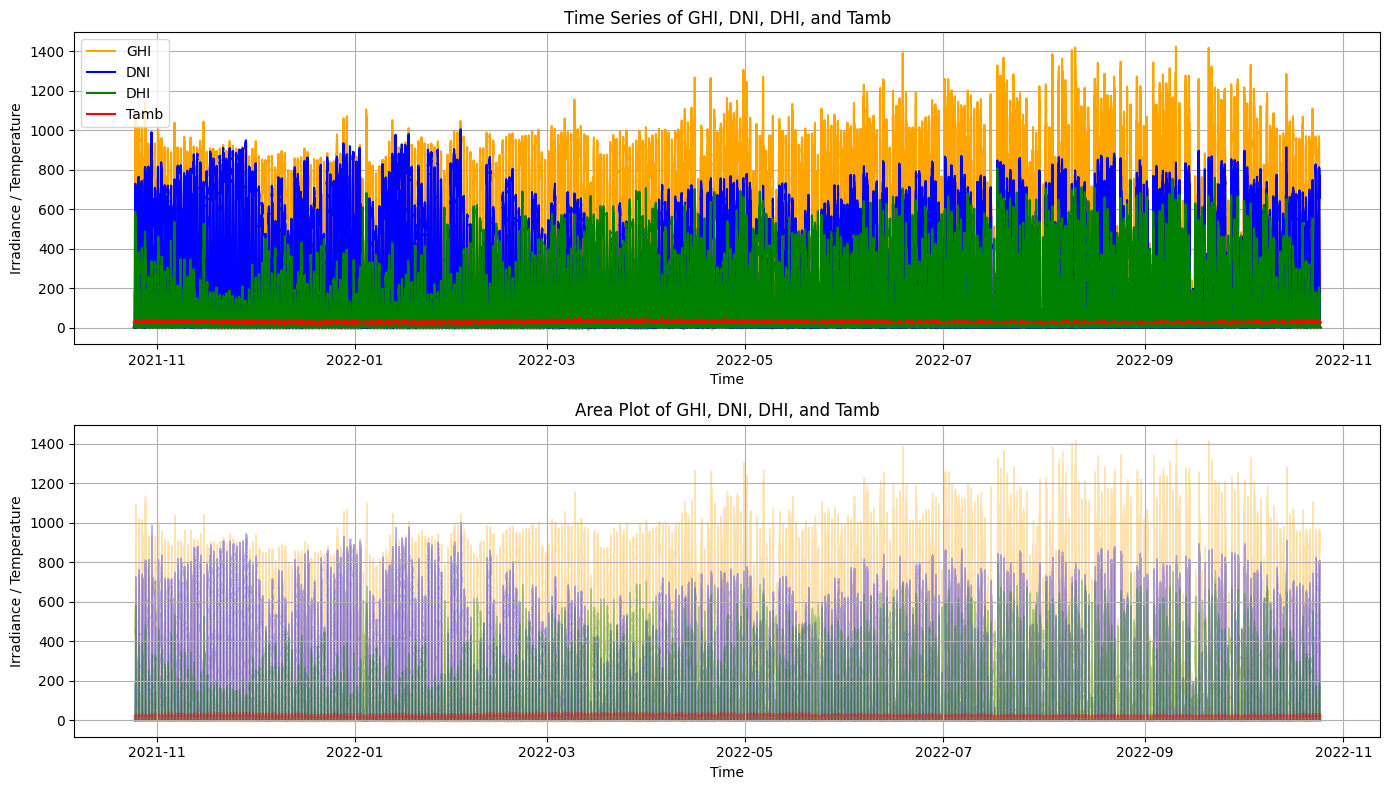

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

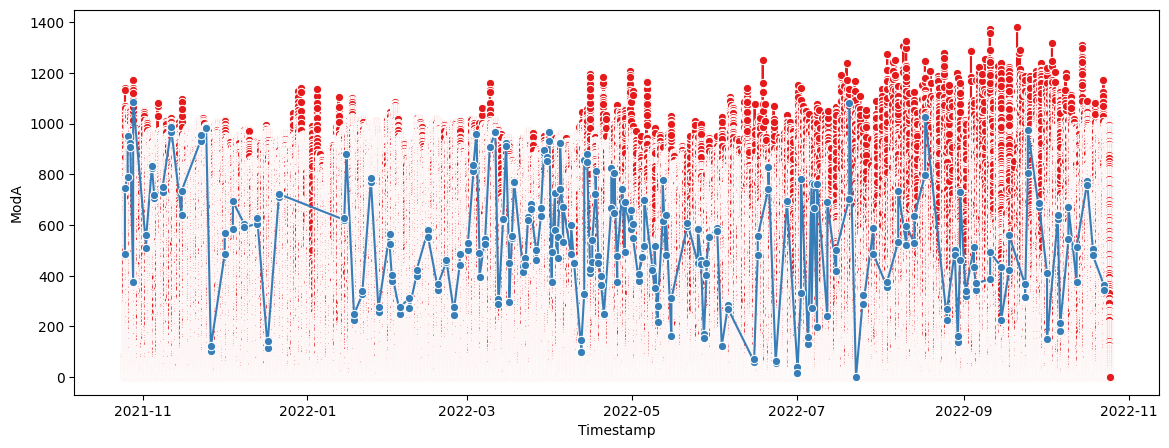

In [7]:
# Time Series Analysis
# Convert the Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as the index
data.set_index('Timestamp', inplace=True)

# Plot time series data for relevant variables
plt.figure(figsize=(14, 8))

# Line plots
plt.subplot(2, 1, 1)
plt.plot(data.index, data['GHI'], label='GHI', color='orange')
plt.plot(data.index, data['DNI'], label='DNI', color='blue')
plt.plot(data.index, data['DHI'], label='DHI', color='green')
plt.plot(data.index, data['Tamb'], label='Tamb', color='red')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Time')
plt.ylabel('Irradiance / Temperature')
plt.legend()
plt.grid()

# Area plots
plt.subplot(2, 1, 2)
plt.fill_between(data.index, data['GHI'], color='orange', alpha=0.3)
plt.fill_between(data.index, data['DNI'], color='blue', alpha=0.3)
plt.fill_between(data.index, data['DHI'], color='green', alpha=0.3)
plt.fill_between(data.index, data['Tamb'], color='red', alpha=0.3)
plt.title('Area Plot of GHI, DNI, DHI, and Tamb')
plt.xlabel('Time')
plt.ylabel('Irradiance / Temperature')
plt.grid()

plt.tight_layout()
plt.show()

# Step 5: Evaluate the impact of Cleaning
plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.index, y='ModA', hue='Cleaning', palette='Set1', marker='o', label='ModA')
sns.lineplot(data=data, x=data.index, y='ModB', hue='Cleaning', palette='Set2', marker='x', label='ModB')
plt.title('Sensor Readings Over Time with Cleaning Status')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend()
plt.grid()
plt.show()



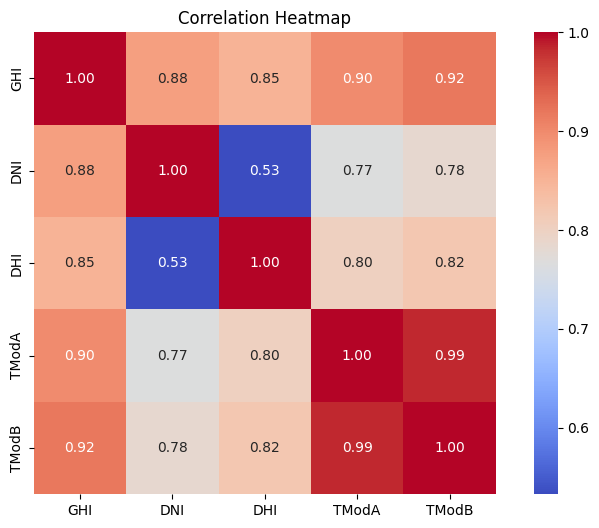

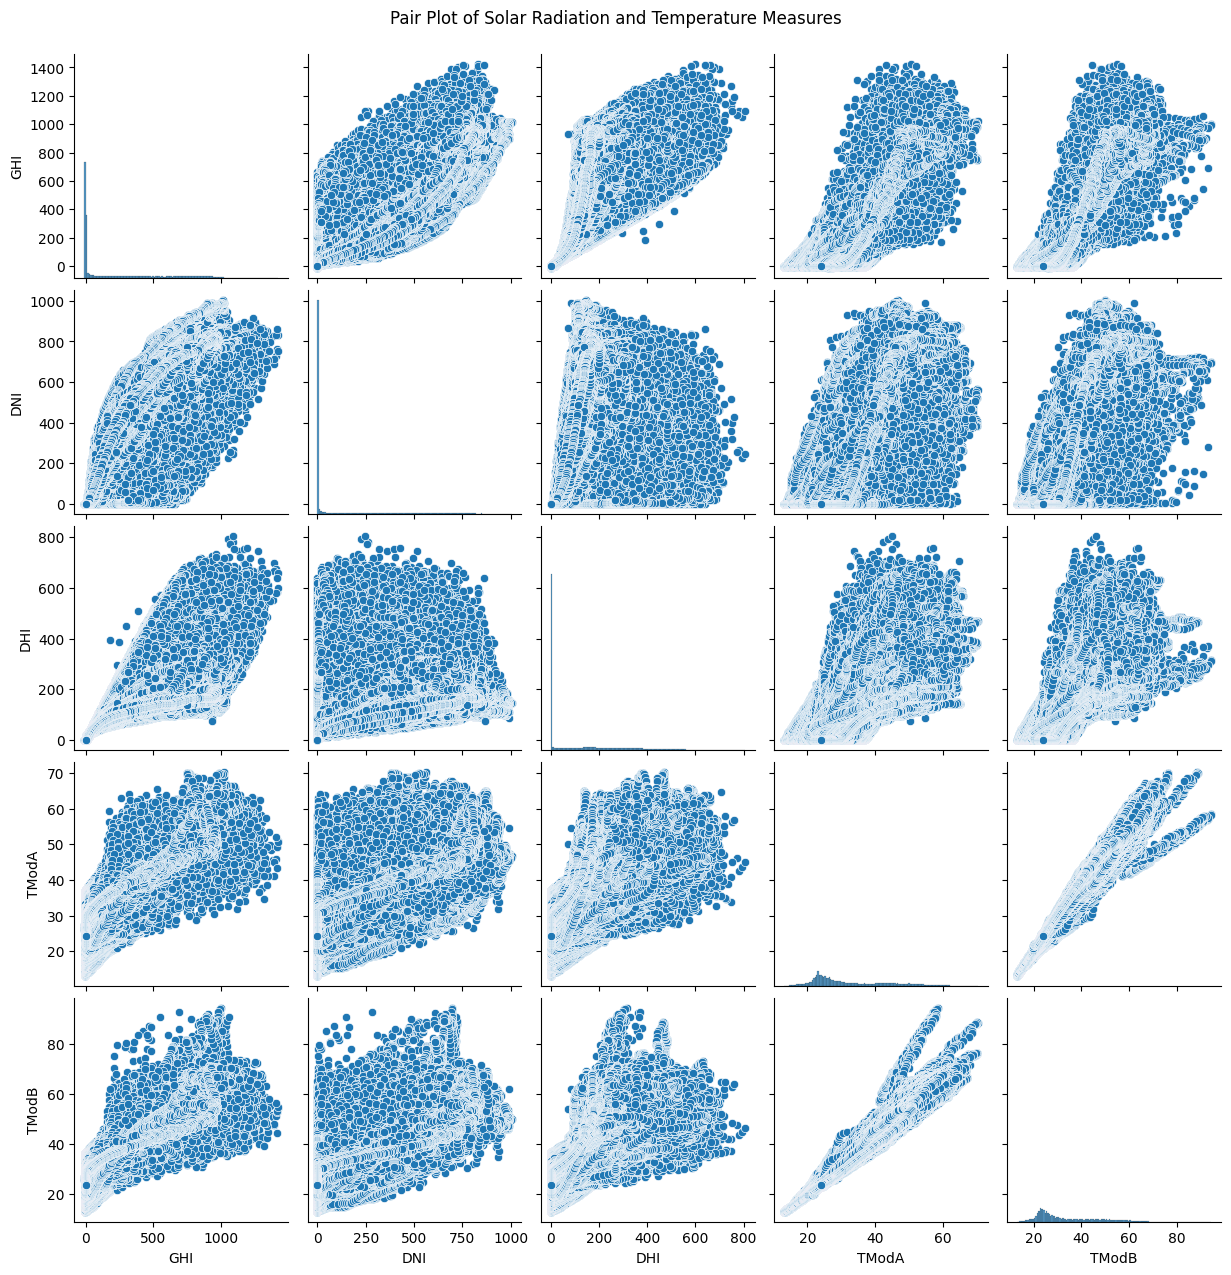

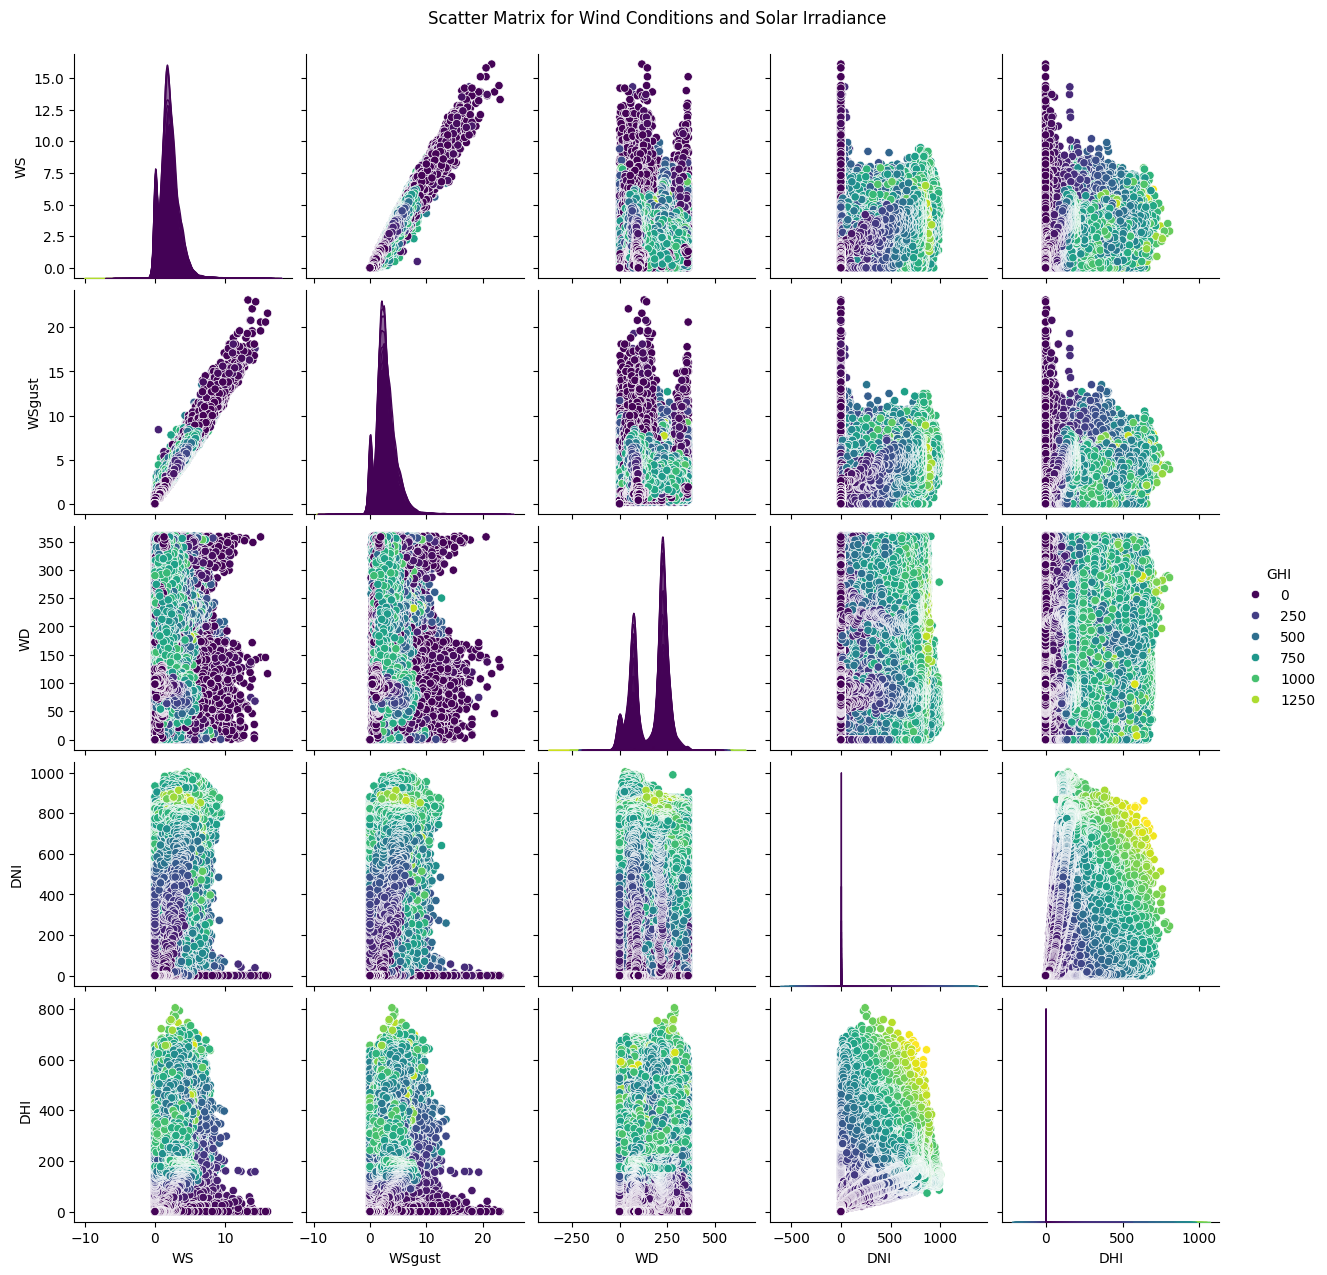

In [8]:
# Calculate Correlation Matrix
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = data[correlation_columns].corr()

# Visualize Correlations with Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot for Correlation Exploration
sns.pairplot(data[correlation_columns])
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

# Investigate Wind Conditions with Scatter Matrix
wind_columns = ['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']
scatter_matrix = sns.pairplot(data[wind_columns], markers='o', hue='GHI', palette='viridis')
plt.suptitle('Scatter Matrix for Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

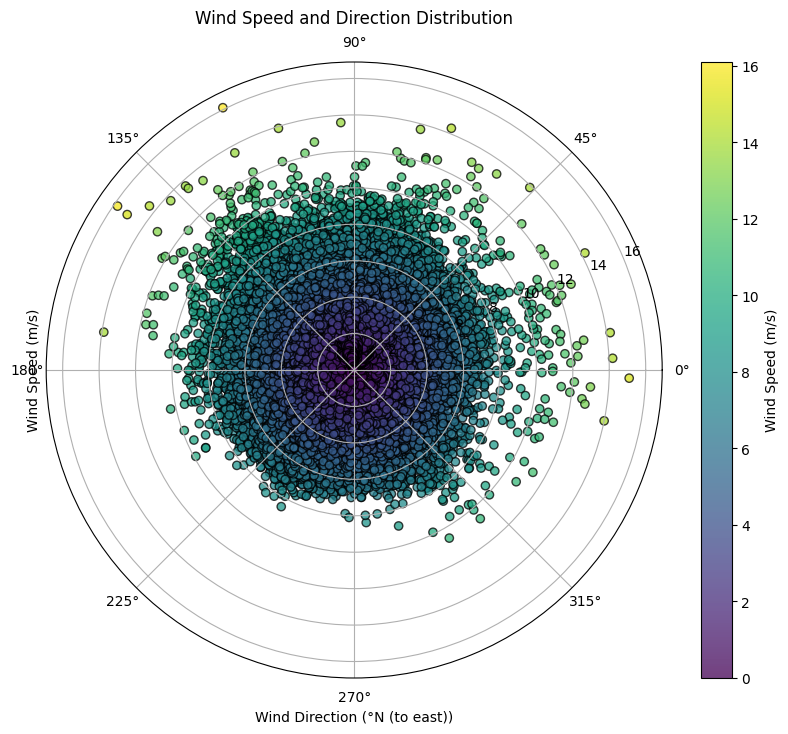

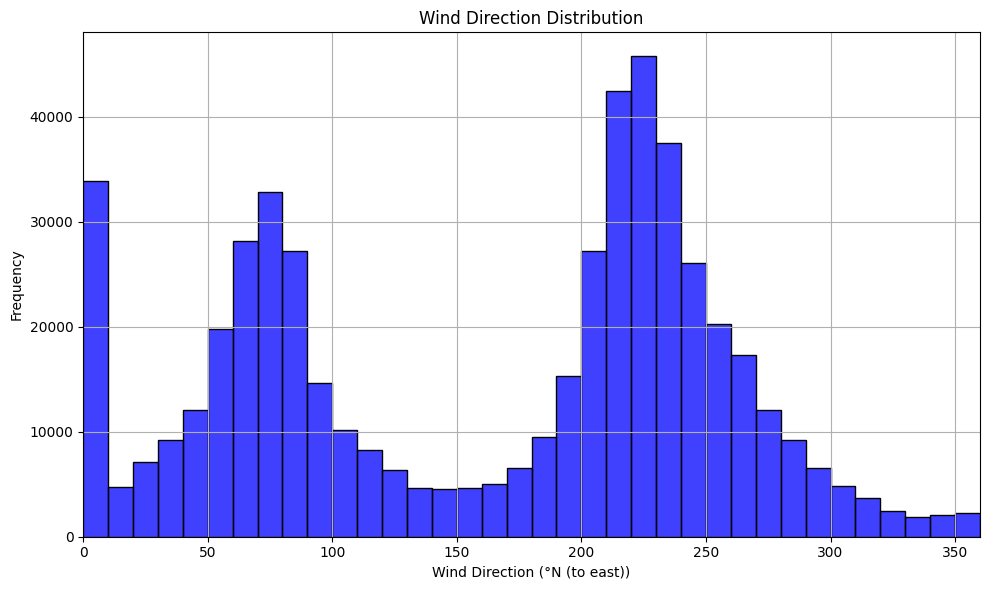

In [12]:
#Wind Analysis

wind_speed = data['WS']  
wind_direction = data['WD'] 

#Create Polar Plot for Wind Direction and Speed
plt.figure(figsize=(10, 8))

# Create a polar subplot
ax = plt.subplot(111, polar=True)

# Convert wind direction from degrees to radians
wind_direction_rad = np.deg2rad(wind_direction)

# Create a scatter plot
sc = ax.scatter(wind_direction_rad, wind_speed, c=wind_speed, cmap='viridis', alpha=0.75, edgecolors='k')

# Add color bar
plt.colorbar(sc, label='Wind Speed (m/s)')

# Set plot title and labels
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_xlabel('Wind Direction (°N (to east))')
ax.set_ylabel('Wind Speed (m/s)')

# Step 6: Analyze Wind Direction Variability
plt.figure(figsize=(10, 6))
sns.histplot(wind_direction, bins=36, kde=False, color='blue', edgecolor='k')
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N (to east))')
plt.ylabel('Frequency')
plt.xlim(0, 360)
plt.grid()

plt.tight_layout()
plt.show()

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9992\1095767031.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


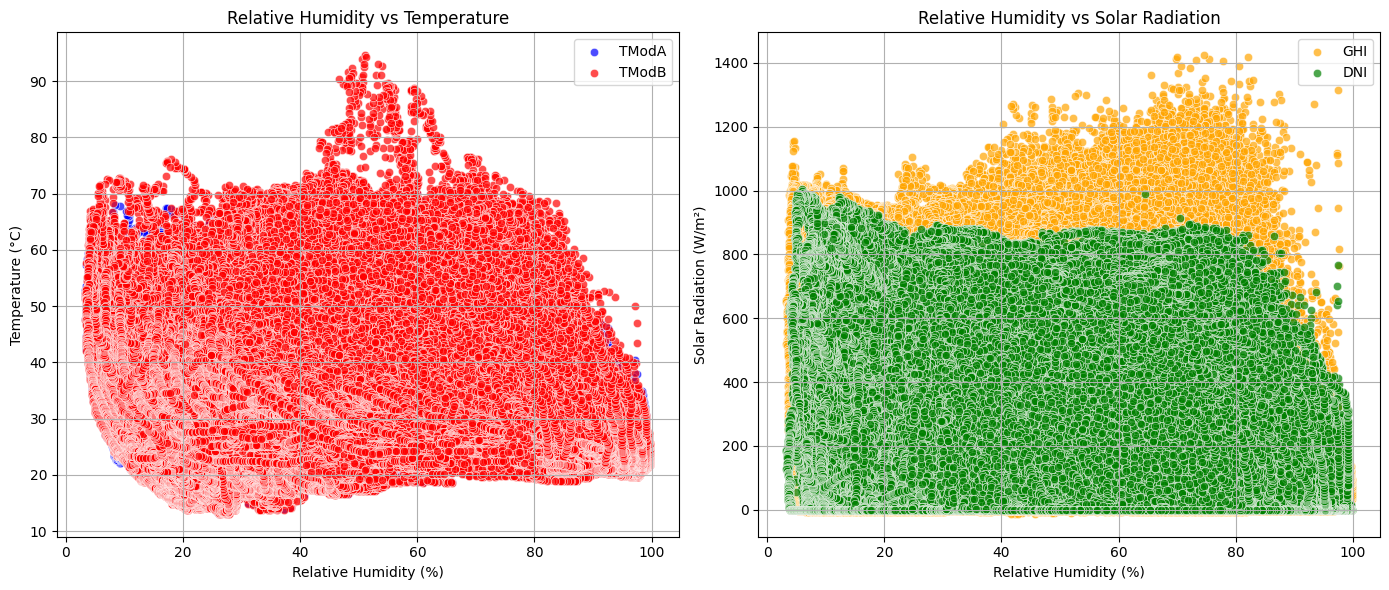

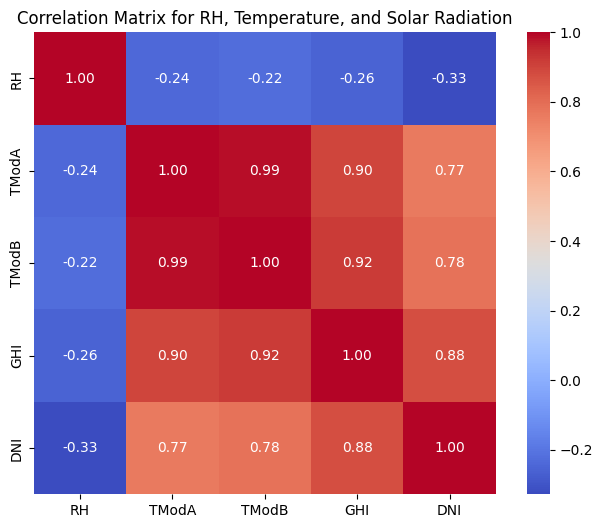

In [13]:
# Visualize Relationships
plt.figure(figsize=(14, 6))

# Scatter plot for RH vs Temperature
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='RH', y='TModA', color='blue', label='TModA', alpha=0.7)
sns.scatterplot(data=data, x='RH', y='TModB', color='red', label='TModB', alpha=0.7)
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

# Scatter plot for RH vs Solar Radiation
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='RH', y='GHI', color='orange', label='GHI', alpha=0.7)
sns.scatterplot(data=data, x='RH', y='DNI', color='green', label='DNI', alpha=0.7)
plt.title('Relative Humidity vs Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#Correlation Analysis
correlation_data = data[['RH', 'TModA', 'TModB', 'GHI', 'DNI']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix for RH, Temperature, and Solar Radiation')
plt.show()

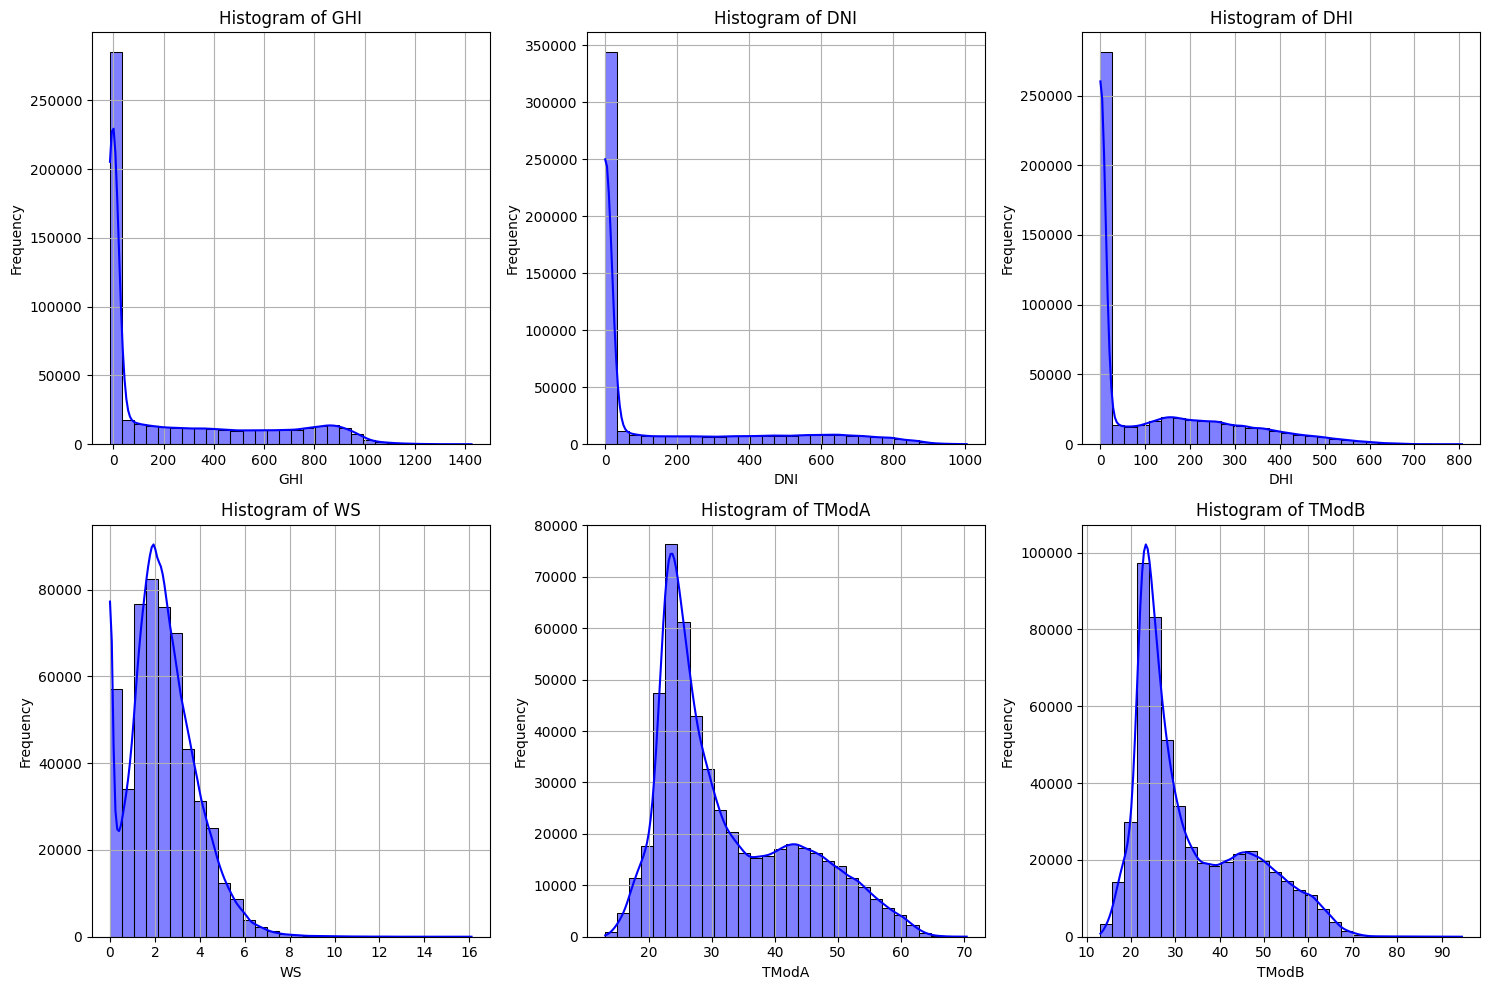

In [14]:
#Create Histograms
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']  # Add or remove variables as needed

plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
    sns.histplot(data[variable], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()

In [15]:
# Calculate Z-scores
# Specify the columns for which you want to calculate Z-scores
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']  # Adjust as necessary

# Calculate Z-scores
z_scores = (data[variables] - data[variables].mean()) / data[variables].std()

# Step 5: Flag Outliers
threshold = 3  # Common threshold for Z-scores
outliers = (z_scores.abs() > threshold)

# Adding outlier flag to the original DataFrame
for variable in variables:
    data[f'{variable}_outlier'] = outliers[variable]

# Display results
outlier_summary = data[[*variables, *[f'{var}_outlier' for var in variables]]]
print(outlier_summary.head())

                     GHI  DNI  DHI   WS  TModA  TModB  GHI_outlier  \
Timestamp                                                            
2021-10-25 00:01:00 -1.3  0.0  0.0  0.9   24.7   24.4        False   
2021-10-25 00:02:00 -1.3  0.0  0.0  1.1   24.7   24.4        False   
2021-10-25 00:03:00 -1.3  0.0  0.0  1.2   24.7   24.4        False   
2021-10-25 00:04:00 -1.2  0.0  0.0  1.2   24.7   24.4        False   
2021-10-25 00:05:00 -1.2  0.0  0.0  1.3   24.7   24.4        False   

                     DNI_outlier  DHI_outlier  WS_outlier  TModA_outlier  \
Timestamp                                                                  
2021-10-25 00:01:00        False        False       False          False   
2021-10-25 00:02:00        False        False       False          False   
2021-10-25 00:03:00        False        False       False          False   
2021-10-25 00:04:00        False        False       False          False   
2021-10-25 00:05:00        False        False       F

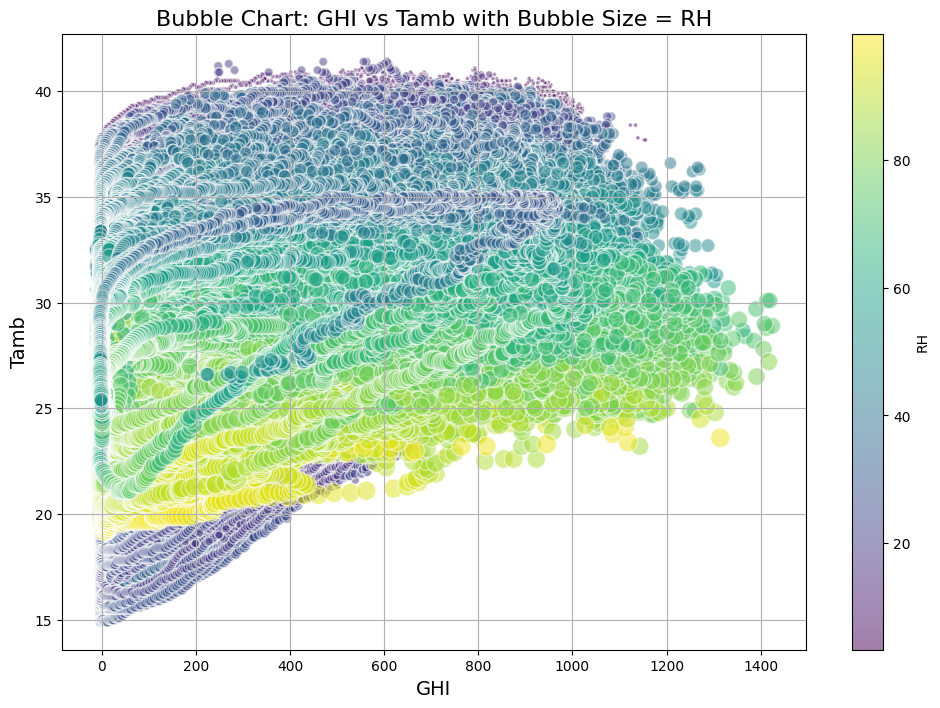

In [16]:
#Create a Bubble Chart
plt.figure(figsize=(12, 8))

# Define the variables
x = 'GHI'  # X-axis variable
y = 'Tamb'  # Y-axis variable
size = 'RH'  # Bubble size variable (can also use 'BP' for Barometric Pressure)

# Create the bubble chart
scatter = plt.scatter(data[x], data[y], 
                      s=data[size] * 2,  # Scale bubble size (adjust multiplier as needed)
                      alpha=0.5, 
                      c=data[size], 
                      cmap='viridis', 
                      edgecolors='w')

# Add titles and labels
plt.title(f'Bubble Chart: {x} vs {y} with Bubble Size = {size}', fontsize=16)
plt.xlabel(x, fontsize=14)
plt.ylabel(y, fontsize=14)

# Add a color bar
plt.colorbar(scatter, label=size)

plt.grid()
plt.show()

In [17]:
# Clean the Data

#Drop columns that are entirely null
columns_to_drop = data.columns[data.isnull().all()]
data.drop(columns=columns_to_drop, inplace=True)

#Handling missing values for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)  # Fill with mean

#Handling missing values for object columns (e.g., Comments)
object_columns = data.select_dtypes(include=['object']).columns
for column in object_columns:
    data[column].fillna('No Comment', inplace=True)  # Replace with a default value

#Addressing anomalies (Example: Replace negative values in columns that shouldn't have them)
# Adjust the column names as necessary
data.loc[data['GHI'] < 0, 'GHI'] = 0  # Example for GHI
data.loc[data['DNI'] < 0, 'DNI'] = 0  # Example for DNI
data.loc[data['Tamb'] < -30, 'Tamb'] = None  # Example for Tamb, replace unrealistic values

# Verify cleaning
print(data.info())  # Check data types and non-null counts after cleaning
print(data.head())  # Display the first few rows of the cleaned data

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_9992\2846446360.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)  # Fill with mean


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
